In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 55502
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=33>
   FREQ      ERR    LGINT    DR     ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l      name     Lab 
   MHz       MHz   MHz nm2         1 / cm          u                                                                                                        
 float64   float64 float64 int64  float64  int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64    str11     bool
---------- ------- ------- ----- --------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----------- -----
 85760.502    0.05 -5.0623     3   19.9083    23    55   502   303    11     2    10    --    --    --    11     1    11    --    --    -- C2H5CN, v=0  True
85763.5775  0.0141 -7.6141     3  361.2222    97    55   502   303    48     4    45    --    --    --    49     2    48    --    --    -- C2H5CN, v=0 False
85890.1702  0.0141 -6.8988     3  361.2

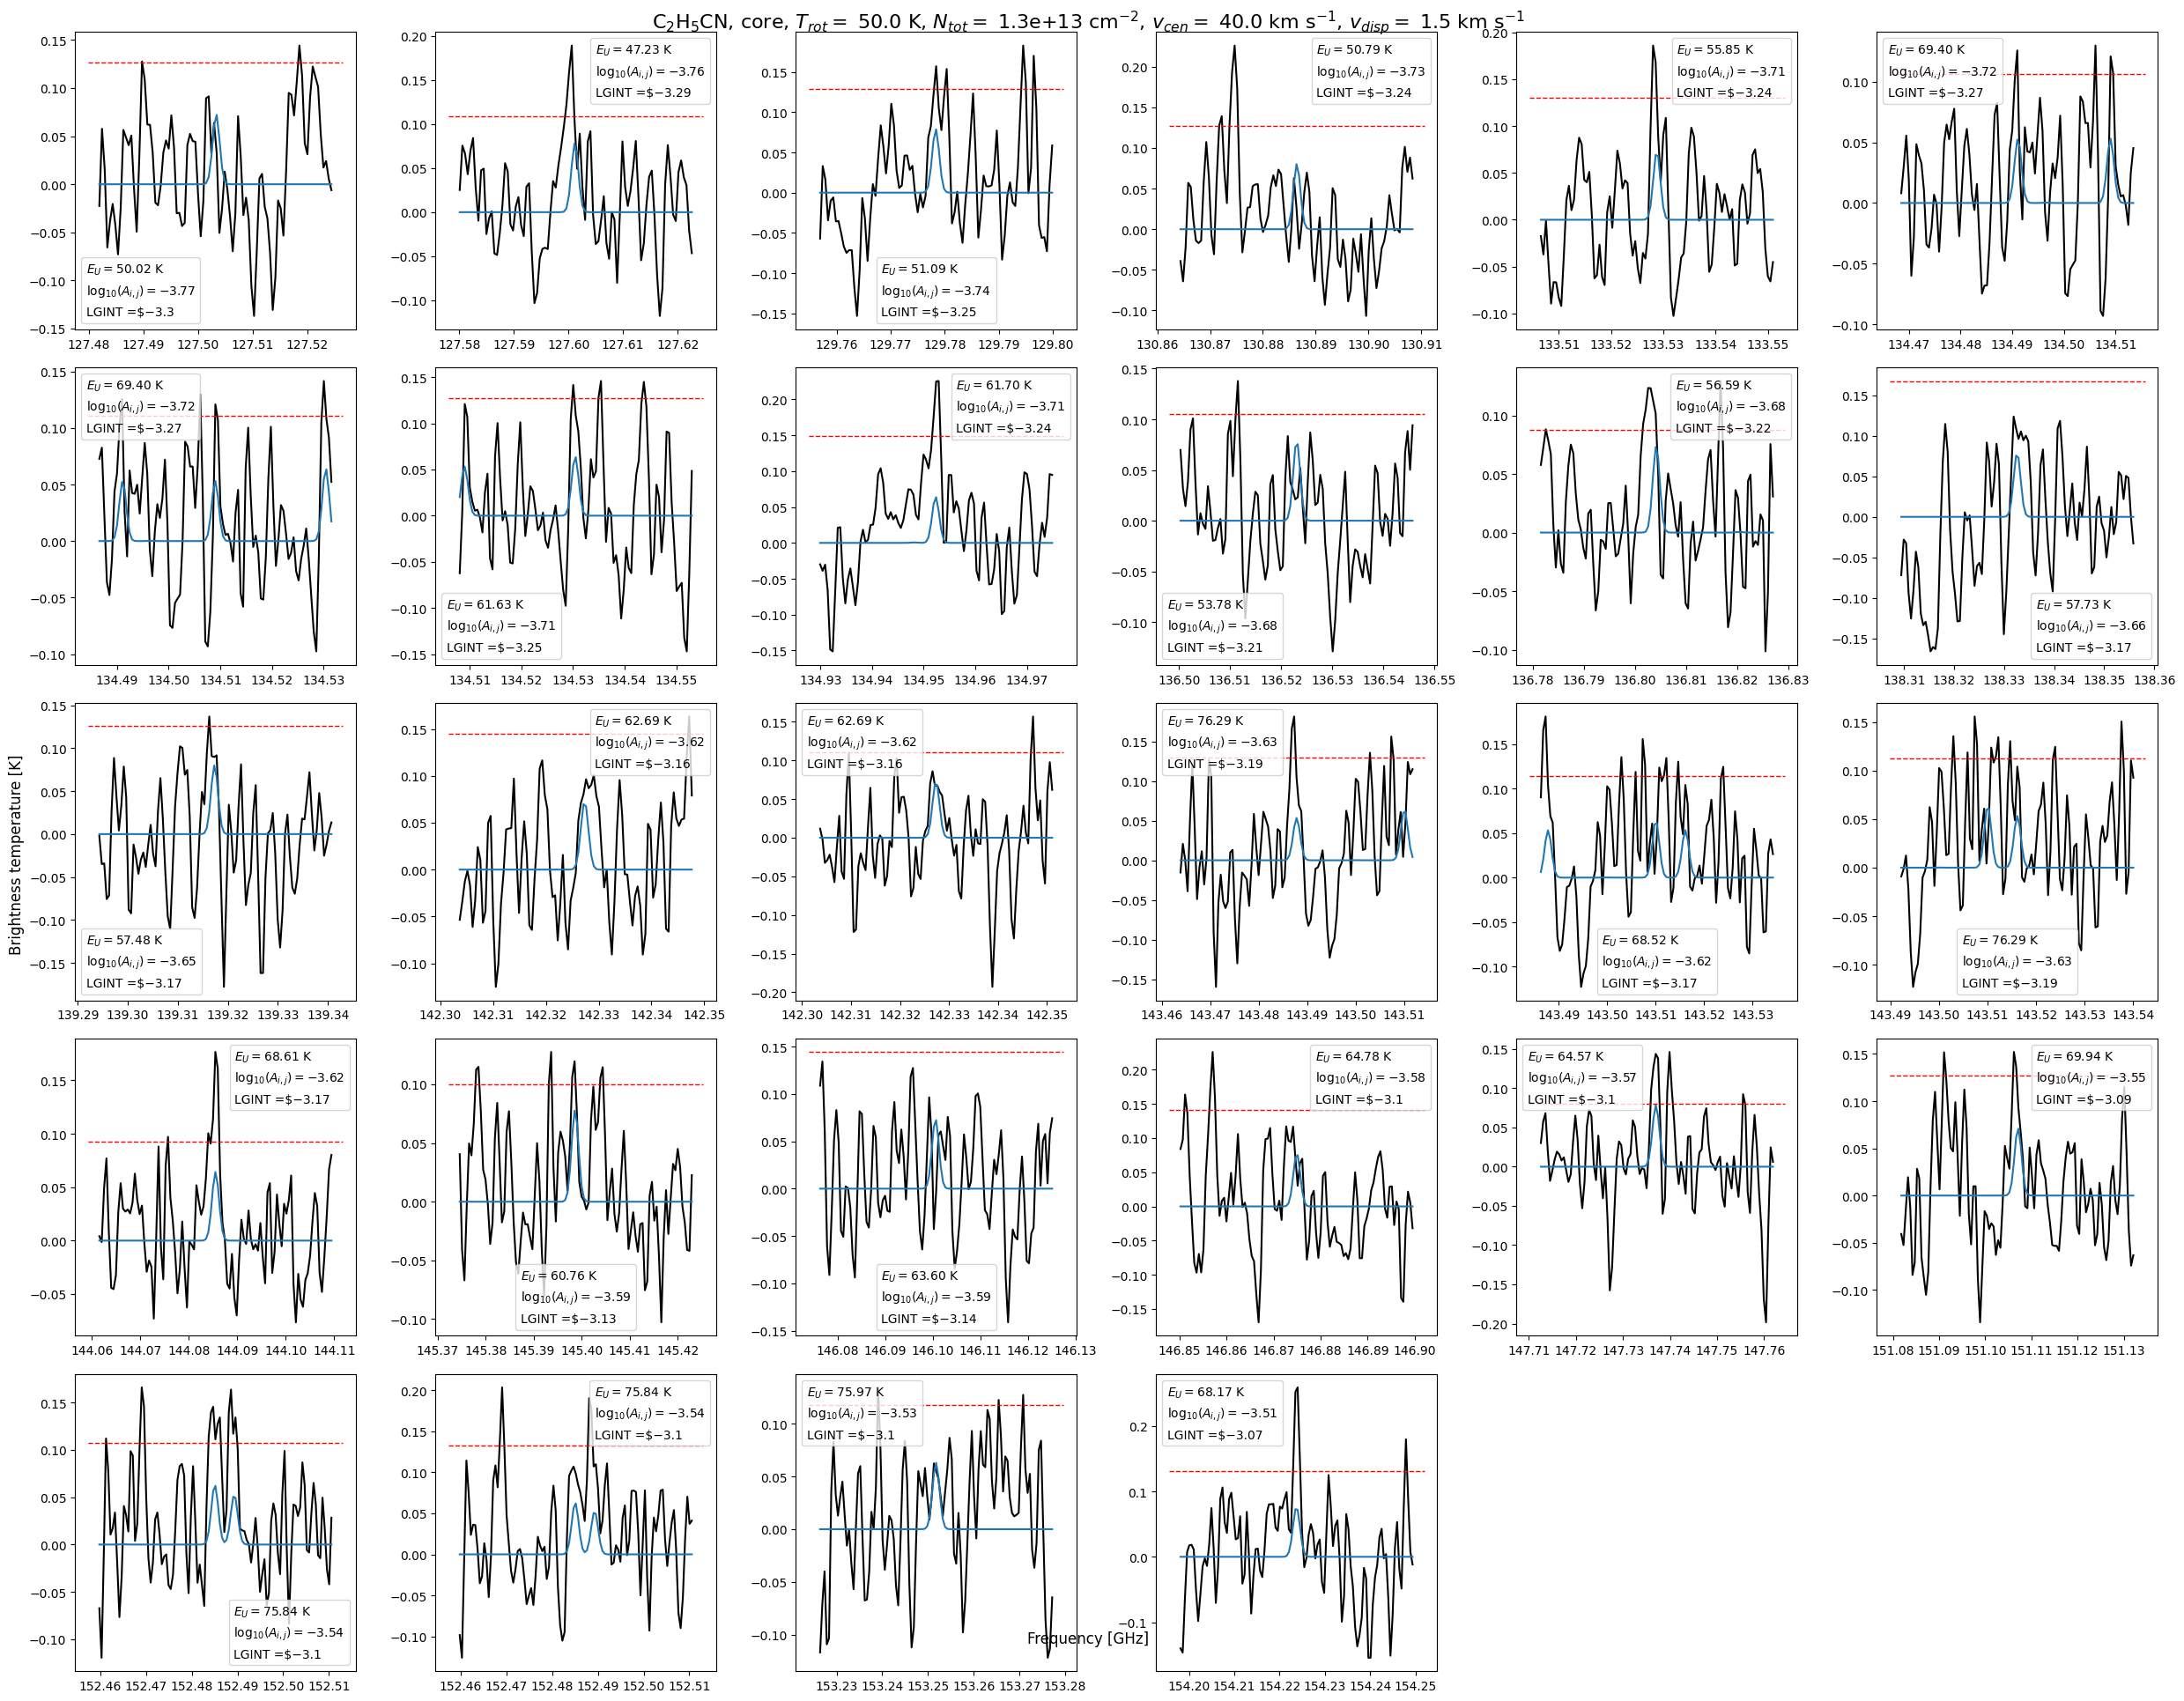

In [15]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 1.3e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=25, fig_height=20, 
               nrows=5, ncols=6, parse_loc=False, line_by_line=True, name_for_plot=f'C$_2$H$_5$CN', extr_type="coord", crd=crd,
               show_2_sigma=True, EU_cutoff_K=80, LGINT_cutoff=-3.3)

In [16]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

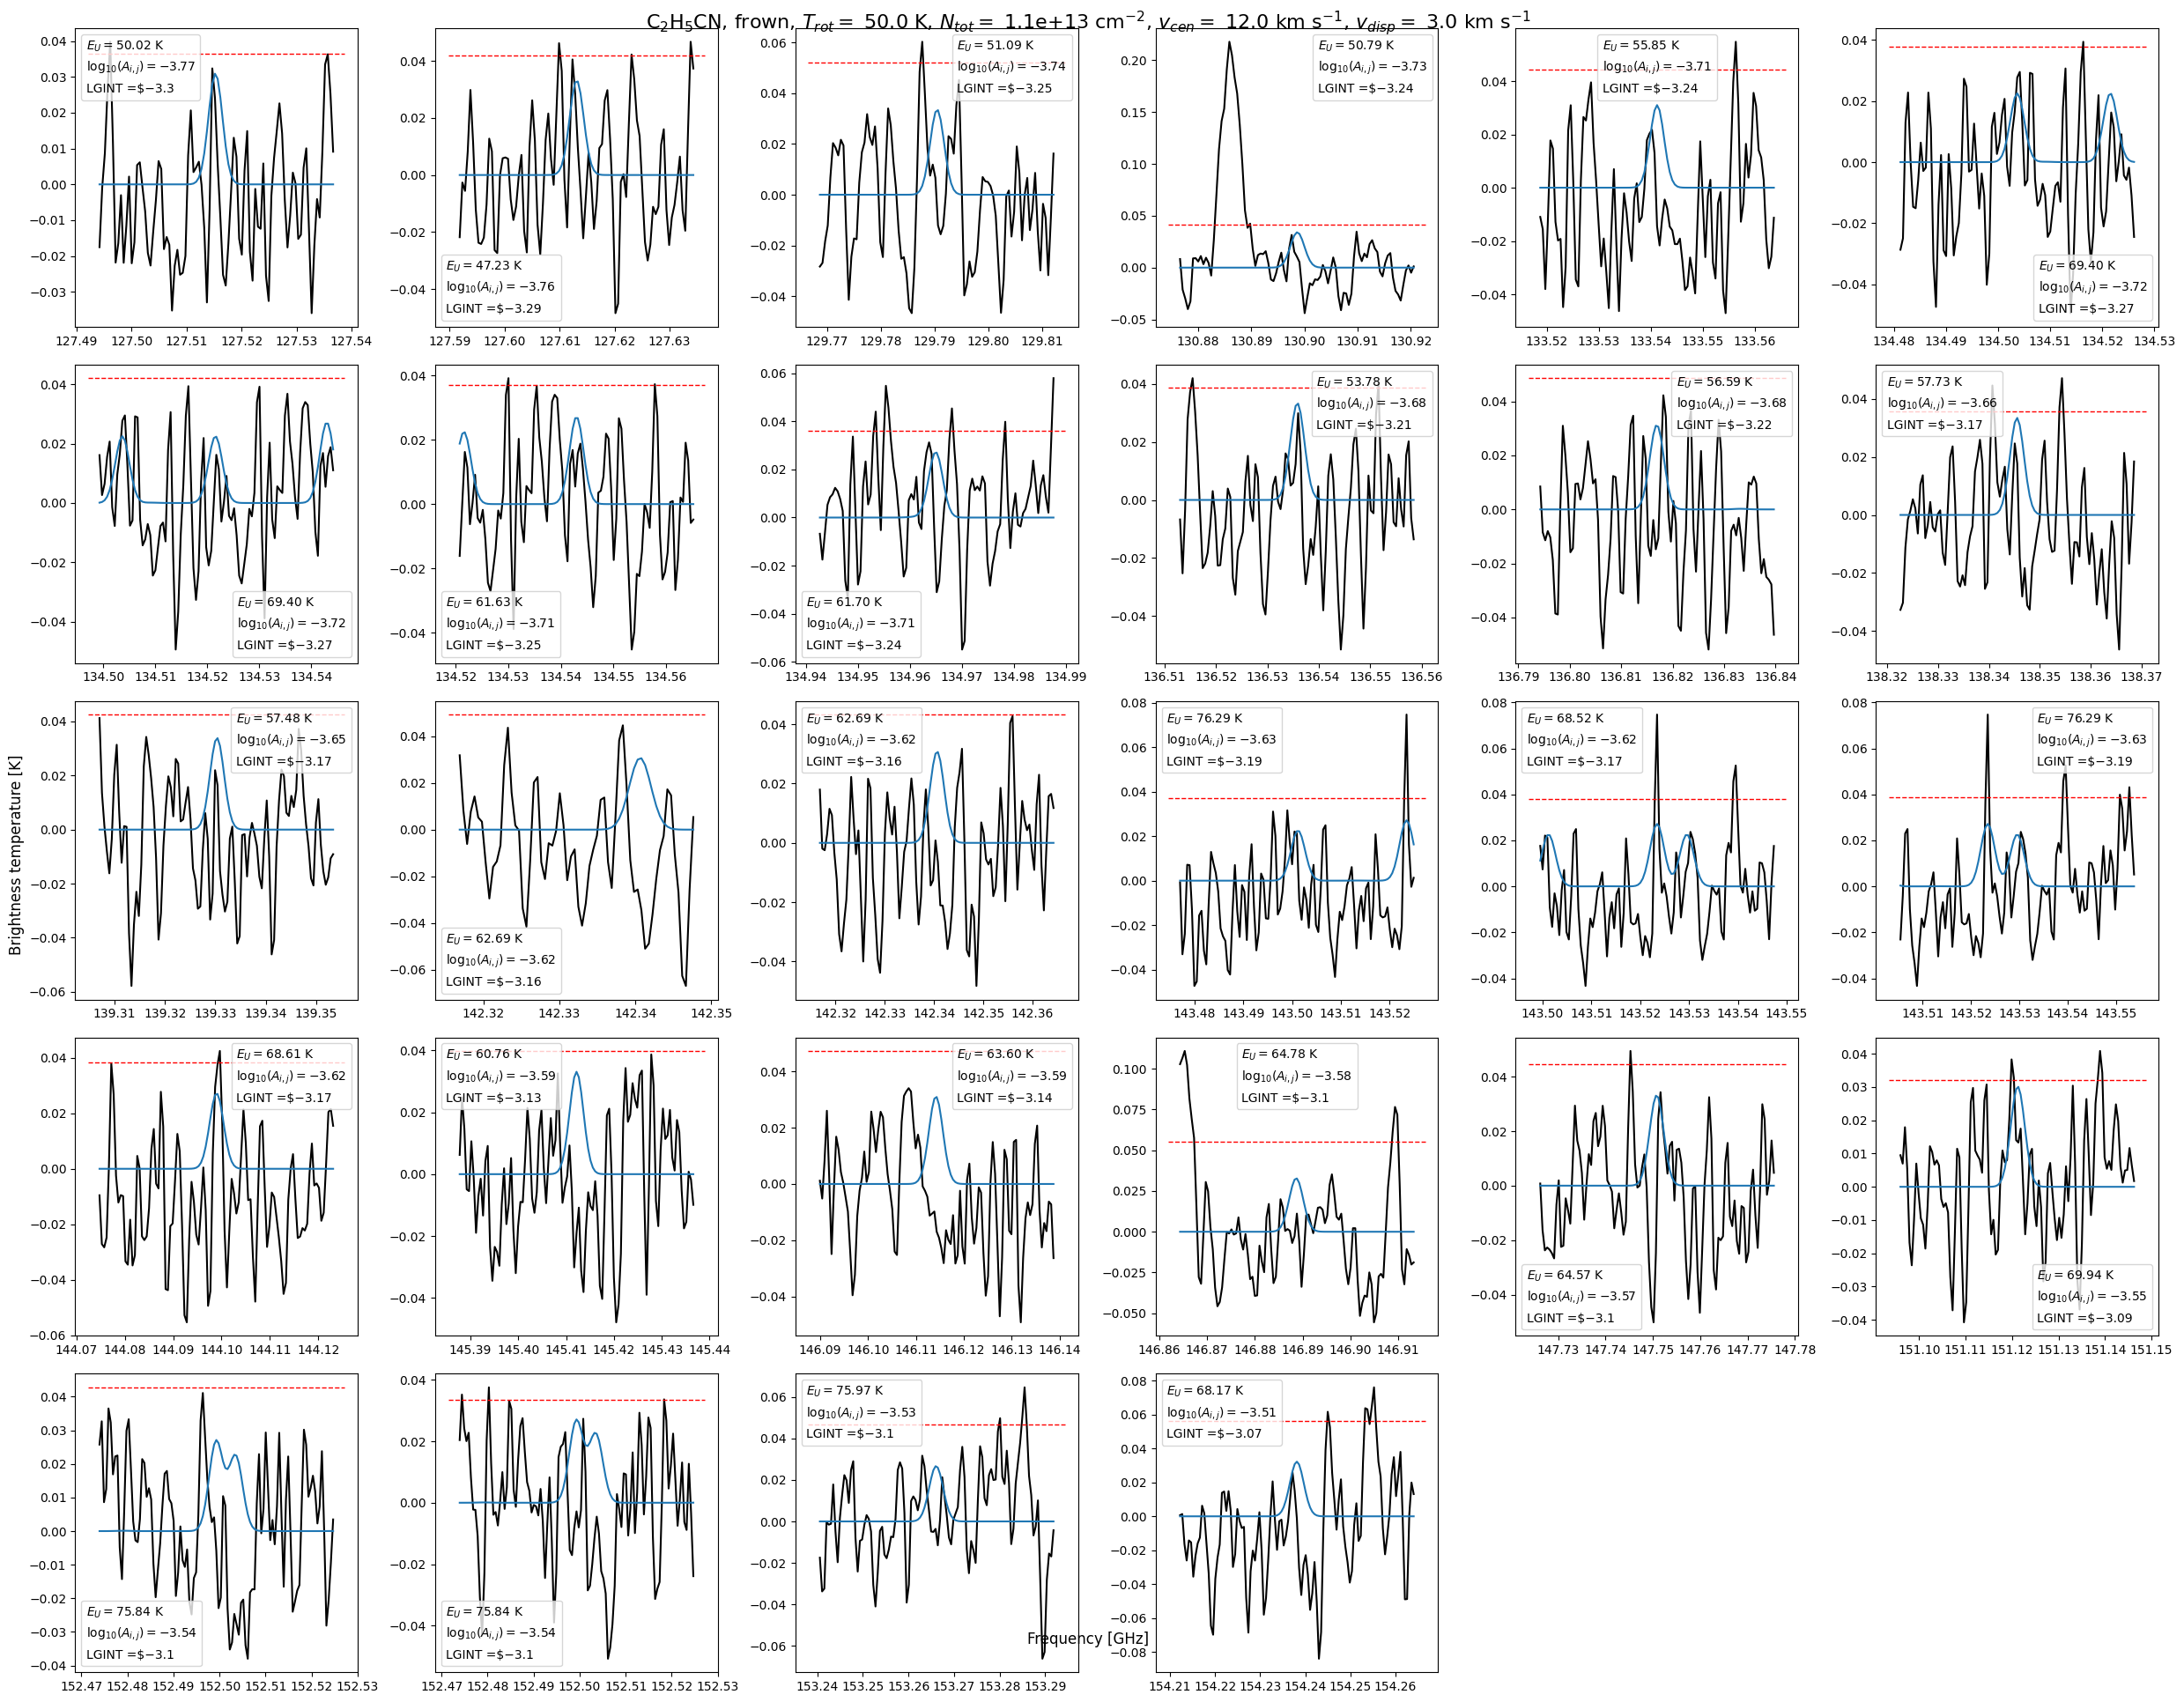

In [19]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 1.1e+13, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=25, fig_height=20, 
                       nrows=5, ncols=6, parse_loc=False, ret_tbl=True, line_by_line=True, name_for_plot=f'C$_2$H$_5$CN', 
                       extr_type="reg", EU_cutoff_K=80, show_2_sigma=True, LGINT_cutoff=-3.3, return_freqs=True)

In [ ]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 30., N_tot = 1.5e+13, v_cen = 40.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=25, fig_height=20, 
                       nrows=5, ncols=6, parse_loc=False, ret_tbl=True, line_by_line=True, name_for_plot=f'C$_2$H$_5$CN', 
                       extr_type="reg", EU_cutoff_K=80, show_2_sigma=True, LGINT_cutoff=-3.3, return_freqs=True)

In [ ]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=15, fig_height=10, nrows=5, ncols=6, name_for_plot=f'C$_2$H$_5$CN')

In [ ]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12.*u.km/u.s, fig_width=15, fig_height=10, nrows=5, ncols=6, name_for_plot=f'C$_2$H$_5$CN')

In [ ]:
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters
from pyspeckit.spectrum.models import lte_molecule
freqs, aij, deg, EU, partfunc = get_molecular_parameters(molecule_name="C2H5CN", 
                                                                         molecule_tag=55502, 
                                                                         catalog='CDMS', 
                                                                         parse_name_locally=False, 
                                                                         return_table=False, 
                                                                         fmin=90*u.GHz, 
                                                                         fmax=102*u.GHz)

mod = lte_molecule.generate_model(np.arange(90,102,0.003)*u.GHz, 12*u.km/u.s, 3*u.km/u.s, 30, 7.5e+13,
                                                      freqs, aij, deg, EU, partfunc)
plt.figure(figsize=(30,5))
plt.plot(np.arange(90,102,0.003), mod)
plt.xlim(99.4,99.6)